In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 47.6MB/s]
100% 1.06G/1.06G [00:11<00:00, 99.7MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [9]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [10]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
# Creating CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 100ms/step - loss: 1.1511 - accuracy: 0.5933 - val_loss: 0.6085 - val_accuracy: 0.6740
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5722 - accuracy: 0.7029 - val_loss: 0.5347 - val_accuracy: 0.7220
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4903 - accuracy: 0.7616 - val_loss: 0.5331 - val_accuracy: 0.7470
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4932 - accuracy: 0.7763 - val_loss: 0.4327 - val_accuracy: 0.7992
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3872 - accuracy: 0.8269 - val_loss: 0.4473 - val_accuracy: 0.7910
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3241 - accuracy: 0.8583 - val_loss: 0.4716 - val_accuracy: 0.7816
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2581 - accuracy: 0.8954 - val_loss: 0.5342 - val_ac

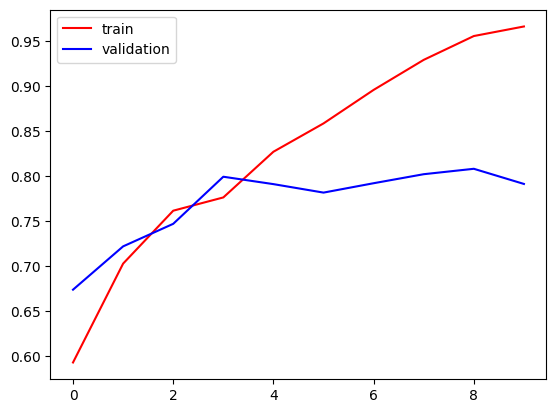

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

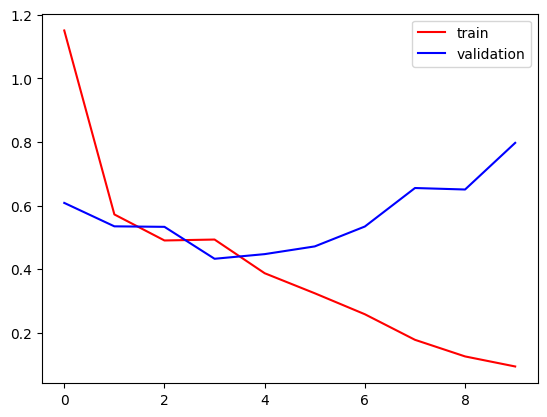

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
import cv2

In [19]:
test_img = cv2.imread('/content/cat.jpg')

array([[[ 15,  36,  33],
        [ 40,  65,  61],
        [ 18,  49,  46],
        ...,
        [ 52, 162, 156],
        [ 53, 163, 157],
        [ 53, 163, 157]],

       [[  0,  19,  13],
        [  0,  21,  15],
        [ 11,  43,  38],
        ...,
        [ 53, 163, 157],
        [ 54, 164, 158],
        [ 54, 164, 158]],

       [[ 82, 121, 106],
        [ 26,  62,  48],
        [ 12,  44,  33],
        ...,
        [ 54, 165, 161],
        [ 54, 165, 161],
        [ 55, 166, 162]],

       ...,

       [[  0,  47,  27],
        [  3,  64,  44],
        [ 32,  87,  68],
        ...,
        [  6,  93,  83],
        [  9,  95,  83],
        [ 10,  96,  84]],

       [[  0,  40,  20],
        [  0,  55,  35],
        [ 30,  86,  67],
        ...,
        [  5,  92,  82],
        [  7,  93,  81],
        [  9,  95,  83]],

       [[  0,  50,  30],
        [  0,  58,  38],
        [ 25,  84,  64],
        ...,
        [  5,  91,  81],
        [  9,  92,  83],
        [ 10,  93,  84]]], dtype=uint8)
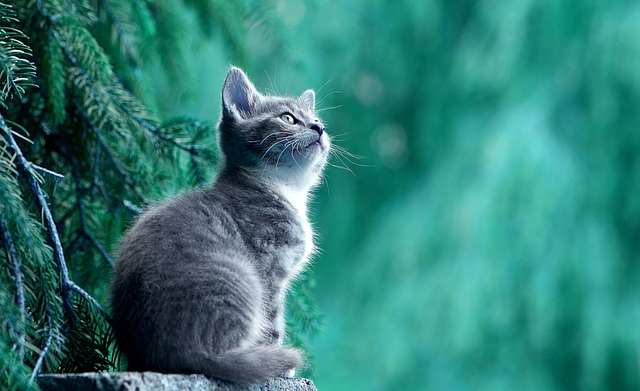

In [20]:
test_img

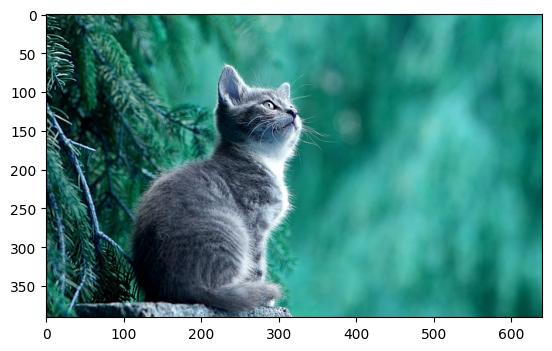

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(391, 640, 3)

In [23]:
test_img = cv2.resize(test_img,(256,256))

array([[[ 25,  48,  44],
        [  4,  36,  32],
        [  1,  21,  19],
        ...,
        [ 47, 157, 151],
        [ 51, 161, 155],
        [ 53, 163, 157]],

       [[ 32,  65,  52],
        [  7,  34,  25],
        [  7,  24,  18],
        ...,
        [ 49, 161, 154],
        [ 52, 163, 158],
        [ 54, 165, 161]],

       [[126, 182, 166],
        [ 51,  97,  85],
        [ 14,  39,  30],
        ...,
        [ 51, 164, 157],
        [ 56, 167, 163],
        [ 58, 169, 165]],

       ...,

       [[  9,  69,  48],
        [ 27,  75,  59],
        [  5,  45,  39],
        ...,
        [  4,  93,  83],
        [  6,  93,  83],
        [ 10,  98,  85]],

       [[  2,  58,  38],
        [ 40,  92,  76],
        [ 25,  68,  62],
        ...,
        [  4,  92,  81],
        [  4,  92,  81],
        [  9,  95,  83]],

       [[  0,  55,  35],
        [ 30,  84,  68],
        [ 37,  81,  76],
        ...,
        [  2,  88,  80],
        [  4,  90,  80],
        [  9,  92,  83]]], dtype=uint8)
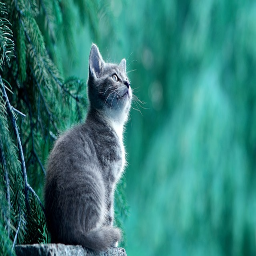

In [24]:
test_img

In [26]:
test_input = test_img.reshape((1,256,256,3))

In [27]:
model.predict(test_input) # '0' as output means cat and '1' as dog

1/1 [==============================] - 1s 1s/step


array([[0.]], dtype=float32)